# **Minor2 : Multiple Diagnosis system using Machine Learning**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# As the dataset is divided into folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
path='C:/Users/Nitin Chaudhary/OneDrive/Documents/Himanshu Minor/Minor/dataset'

w,h = 400,400
batch_size = 8

train_path = path+'/train'
test_path = path+'/test'
val_path = path+'/val'

train_img_gen = ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range=0.3
)

test_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

val_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 1840 images belonging to 4 classes.
Found 164 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [3]:
train_dataset.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

(8, 400, 400, 3)


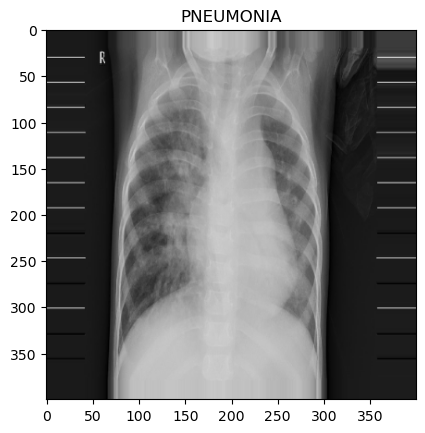

(8, 400, 400, 3)


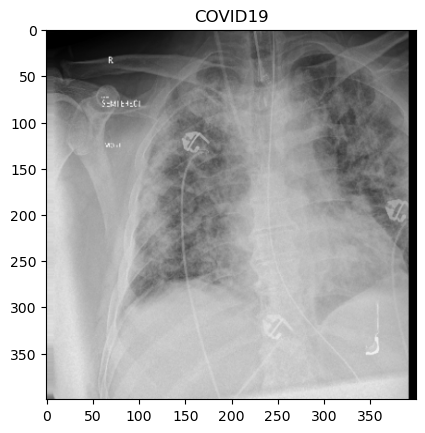

(8, 400, 400, 3)


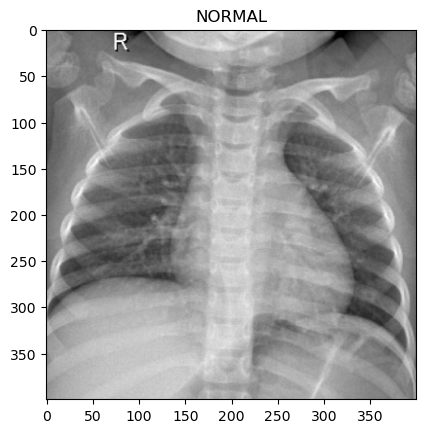

(8, 400, 400, 3)


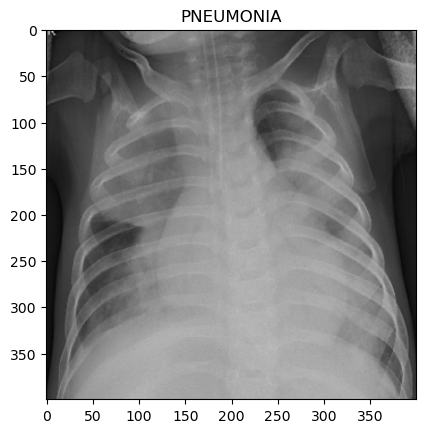

(8, 400, 400, 3)


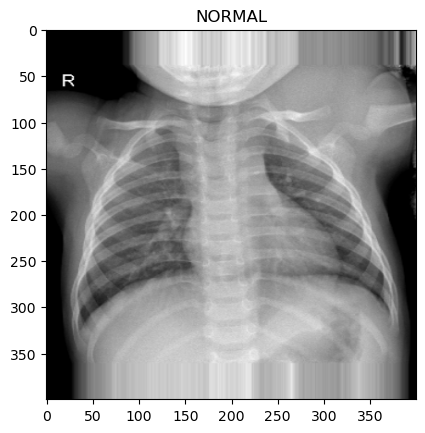

In [4]:
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

for _ in range(5):
    img, label = train_dataset.next()
    print(img.shape)
    plt.title(classes[np.argmax(label[0])])
    plt.imshow(img[0])
    plt.show()

In [5]:
train_dataset.image_shape

(400, 400, 3)

In [6]:
# model = models.Sequential()

# # Convolutional layers
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten layer
# model.add(layers.Flatten())

# # Dense layers
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))  # dropout to avoid overfitting
# model.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model architecture
# model.summary()

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
resnetModel = models.Sequential()

ResNet_101_V2 = tf.keras.applications.ResNet101V2(
                include_top = False,
                weights="imagenet",
                input_shape=(w,h,3),
                pooling='max',
                classes=4
            )

for layer in ResNet_101_V2.layers:
    layer.trainable = False

resnetModel.add(ResNet_101_V2)
resnetModel.add(layers.Flatten())
resnetModel.add(layers.Dense(512, activation='relu'))
resnetModel.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# Compile the model
resnetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43,677,700
Trainable params: 1,051,140
Non-trainable params: 42,626,560
_________________________________________________________________


In [8]:
# Save best model
weight_path = path+'/working/'

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

In [9]:
history = resnetModel.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[model_checkpoint])

Epoch 1/10
230/230 [==============================] - 540s 2s/step - loss: 2.8224 - accuracy: 0.8005 - val_loss: 1.6074 - val_accuracy: 0.7500
Epoch 2/10
230/230 [==============================] - 397s 2s/step - loss: 0.4188 - accuracy: 0.9027 - val_loss: 0.4289 - val_accuracy: 0.9062
Epoch 3/10
230/230 [==============================] - 402s 2s/step - loss: 0.3291 - accuracy: 0.9060 - val_loss: 1.1960 - val_accuracy: 0.7188
Epoch 4/10
129/230 [===============>..............] - ETA: 3:03 - loss: 0.2399 - accuracy: 0.9225

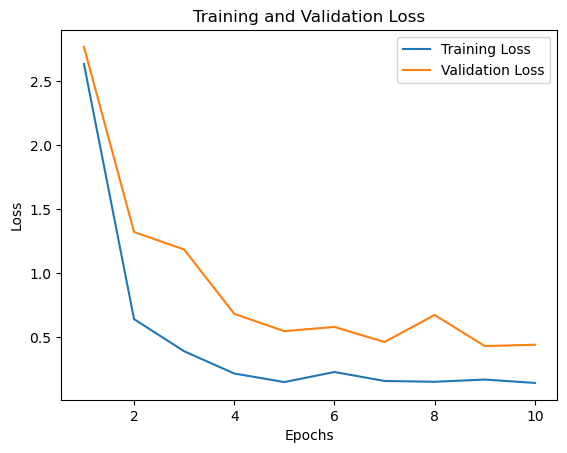

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(history.history['loss'])
# Plot the loss and val_loss
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# load best weights to model
resnetModel.load_weights(weight_path)

# make predictions
predictions = resnetModel.predict(test_dataset)
predictions


21/21 [==============================] - 36s 2s/step


array([[9.99999940e-01, 1.37488874e-11, 2.77882739e-09, 1.64090197e-09],
       [9.93919849e-01, 1.82519329e-07, 6.07988006e-03, 1.43284211e-08],
       [9.99994099e-01, 2.01071293e-09, 3.62631560e-08, 5.85011321e-06],
       [9.99982178e-01, 1.20318919e-08, 6.38815891e-07, 1.71581978e-05],
       [9.99999702e-01, 1.36617614e-14, 1.01518252e-10, 2.43220370e-07],
       [9.99999821e-01, 1.91175877e-11, 3.34523720e-09, 1.15067252e-07],
       [9.99998987e-01, 2.22584483e-13, 1.74531306e-10, 9.35898527e-07],
       [9.99999940e-01, 1.47132639e-10, 2.14024354e-11, 7.40363681e-09],
       [9.99997079e-01, 2.38540633e-13, 6.14795298e-11, 2.86604904e-06],
       [9.90508735e-01, 4.64187565e-07, 1.10624169e-04, 9.38024186e-03],
       [9.99999940e-01, 1.12198084e-10, 8.73240147e-10, 9.56249142e-12],
       [9.99971807e-01, 3.25248761e-09, 1.36033498e-06, 2.68607964e-05],
       [9.99998271e-01, 4.45928716e-09, 3.67541759e-07, 1.27989563e-06],
       [9.98547614e-01, 2.67107270e-09, 1.46783418e

In [ ]:
predicted_class = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_dataset.classes

sns.heatmap(confusion_matrix(true_labels, predicted_class), annot=True)

# Print classification report
print(classification_report(true_labels, predicted_class))
print(test_dataset.class_indices)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()


InvalidParameterError: The 'y_pred' parameter of confusion_matrix must be an array-like. Got 'NORMAL' instead.

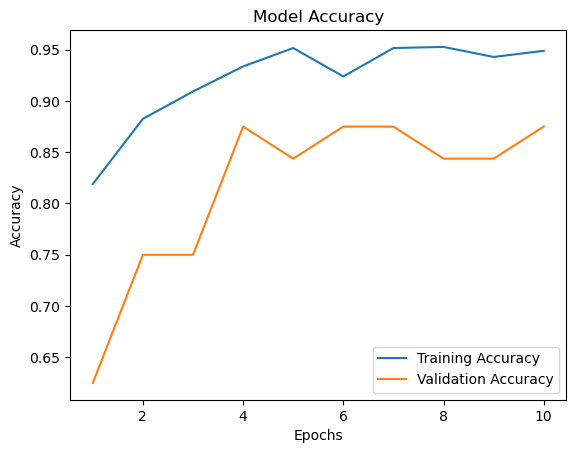

In [ ]:
# Extract accuracy from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = resnetModel.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

21/21 [==============================] - 34s 2s/step - loss: 0.6254 - accuracy: 0.8293
Test Accuracy: 0.8292682766914368


In [ ]:
import os
from tensorflow.keras.preprocessing import image

# Directory containing the images for prediction
images_dir = 'C:/Users/Nitin Chaudhary/OneDrive/Documents/Himanshu Minor/Minor/ChestImages/ChestImages'
# Define the class labels
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

# Iterate over each image in the folder
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img_path = os.path.join(images_dir, filename)
        img = image.load_img(img_path, target_size=(400, 400))  # Resize the image to match the model's input size
        img_array = image.img_to_array(img) / 255.0  # Convert image to array and rescale
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Perform prediction
        predictions = resnetModel.predict(img_array)

        # Get the predicted class label
        predicted_class_index = np.argmax(predictions)
        predicted_class = classes[predicted_class_index]

        # Print the filename and predicted class
        print(f"Image: {filename}, Predicted Class: {predicted_class}")


1/1 [==============================] - 2s 2s/step
Image: BACTERIA-1135262-0001.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 235ms/step
Image: BACTERIA-1135262-0002.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 220ms/step
Image: BACTERIA-1135262-0003.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 297ms/step
Image: BACTERIA-1135262-0004.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 219ms/step
Image: BACTERIA-1220485-0001.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 297ms/step
Image: BACTERIA-1351146-0001.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 301ms/step
Image: BACTERIA-1351146-0002.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 345ms/step
Image: BACTERIA-1351146-0003.jpeg, Predicted Class: PNEUMONIA
1/1 [==============================] - 0s 242ms/step
Image: BACTERIA-1351146-0004.j

In [ ]:
import os
import gradio as gr
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the class labels
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

def predict_image(img):
    # Load the image
    img = image.load_img(img_path, target_size=(400, 400))  # Resize the image to match the model's input size
    img_array = image.img_to_array(img) / 255.0  # Convert image to array and rescale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Perform prediction
    predictions = resnetModel.predict(img_array)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = classes[predicted_class_index]

    return predicted_class

iface = gr.Interface(fn=predict_image, inputs="image", outputs="text")
iface.launch(share = True)



Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://3f106243554c341b3e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 1s 503ms/step
